# Data Exploration for Earthquake Dataset

### Keenan Zucker and James Jang


In this project we are exploring a dataset that includes all of the earthquakes from the last 30 days, which includes attributes like location, magnitude, depth, and more. In this notebook I am going to do some visualization to try to better understand the data. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

quakes = pd.read_csv("./data/query1.csv")

print quakes.columns
print quakes.head()


Index([u'time', u'latitude', u'longitude', u'depth', u'mag', u'magType',
       u'nst', u'gap', u'dmin', u'rms', u'net', u'id', u'updated', u'place',
       u'type', u'horizontalError', u'depthError', u'magError', u'magNst',
       u'status', u'locationSource', u'magSource'],
      dtype='object')
                       time  latitude  longitude  depth  mag magType  nst  \
0  2016-02-27T21:34:40.450Z   36.6381   -97.7400   2.47  2.8   mb_lg  NaN   
1  2016-02-27T21:29:43.370Z  -51.7820   139.5587  10.00  5.9      mb  NaN   
2  2016-02-27T21:02:37.710Z   36.4399   -98.7187   9.82  3.4   mb_lg  NaN   
3  2016-02-27T21:02:12.340Z   36.4662   -98.7378   8.22  3.2   mb_lg  NaN   
4  2016-02-27T19:22:58.400Z   19.1644   -64.8414  66.00  3.4      Md   11   

     gap       dmin   rms    ...                      updated  \
0   43.0   0.222000  0.23    ...     2016-02-27T22:17:59.857Z   
1   44.0  10.314000  0.64    ...     2016-02-27T22:12:11.000Z   
2   29.0   0.022000  0.94    ...     2016-0

In [ ]:
quakes.describe()

In [ ]:
sns.set_context(rc={"figure.figsize": (10, 10)})

sns.jointplot(quakes.latitude, quakes.longitude)

In [ ]:
print quakes.type.unique()

Let's investigate the depth of the quakes

In [ ]:
plt.plot(quakes.depth)

According to USGS, there are 3 categories for depth; shallow, intermediate, and deep. Lets break up the data into those catagories and see what we get!

In [ ]:
shallow = len(quakes[quakes.depth < 70])
intermediate = len(quakes[(quakes.depth >= 70) & (quakes.depth < 300)])
deep = len(quakes[quakes.depth >= 300])

names = ['shallow', 'intermediate', 'deep']
counts = [shallow, intermediate, deep]

sns.barplot(names, counts)
sns.plt.title("Earthquake Categories by Depth")
sns.axlabel("Depth Category Class", "Count of Earthquakes In 30 Days")

In [ ]:
# And now for a pie chart!

colors = ['lightblue', 'lightgreen', 'pink']
plt.pie(counts, labels=names, shadow=True, colors=colors)
plt.title("Pie Chart of Earthquake Depth Categories")
plt.show()

In [ ]:
plt.plot(quakes.mag)
plt.xlabel("count")
plt.ylabel("magnitude")
plt.show()

In [ ]:
plt.xlabel("count")
plt.ylabel("magnitude")

mags = np.array(quakes.mag)
mags = np.sort(mags)
plt.plot(mags)


Let's sort the earthquakes into the classes that appear on http://www.geo.mtu.edu/UPSeis/magnitude.html

In [ ]:

minor = len(quakes[(quakes.mag < 4)])
light = len(quakes[(quakes.mag >= 4) & (quakes.mag < 5)])
moderate = len(quakes[(quakes.mag >= 5) & (quakes.mag < 6)])
strong = len(quakes[(quakes.mag >= 6) & (quakes.mag < 7)])
major = len(quakes[(quakes.mag >= 7) & (quakes.mag < 8)])
great = len(quakes[(quakes.mag >= 8)])

names=['minor', 'light', 'moderate', 'strong', 'major', 'great']
counts=[minor, light, moderate, strong, major, great]

sns.barplot(names, counts)
sns.plt.title("Earthquake Categories by Class")
sns.axlabel("Category Class", "Count of Earthquakes In 30 Days")




In [ ]:
colors = ['blue', 'green', 'red', 'lightcoral']
plt.pie(counts, labels=names, shadow=True, colors=colors)
plt.title("Pie Chart of Earthquake Types")
plt.show()

Now I'm going to try to plot all of the earthquakes across the planet using longitude and latitude. I found a mapping tutorial at http://introtopython.org/visualization_earthquakes.html


In [ ]:
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(16,12))

my_map = Basemap(projection='robin', lat_0=0, lon_0=-100,
              resolution='l', area_thresh=1000.0)

lats = np.array(quakes.latitude)
longs = np.array(quakes.longitude)
mags = np.array(quakes.mag)
# print lats

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))

x,y = my_map(longs, lats)
my_map.plot(x, y, 'ro', markersize=5.0)
    
plt.title('Earthquakes In The Last 30 Days')
plt.show()

Now I'll try again using a color mapping system for earthquakes of larger magnitudes, as well as scaling the dots based off of their relative size 

In [7]:
def get_marker_color_mag(magnitude):
    # Returns green for small earthquakes, yellow for moderate
    #  earthquakes, and red for significant earthquakes.
    if magnitude < 3.0:
        return ('go')
    elif magnitude < 5.0:
        return ('yo')
    else:
        return ('ro')
    
def get_marker_color_depth(depth):
    if depth < 70.0:
        return ('go')
    elif depth < 300.0:
        return ('yo')
    else:
        return ('ro')

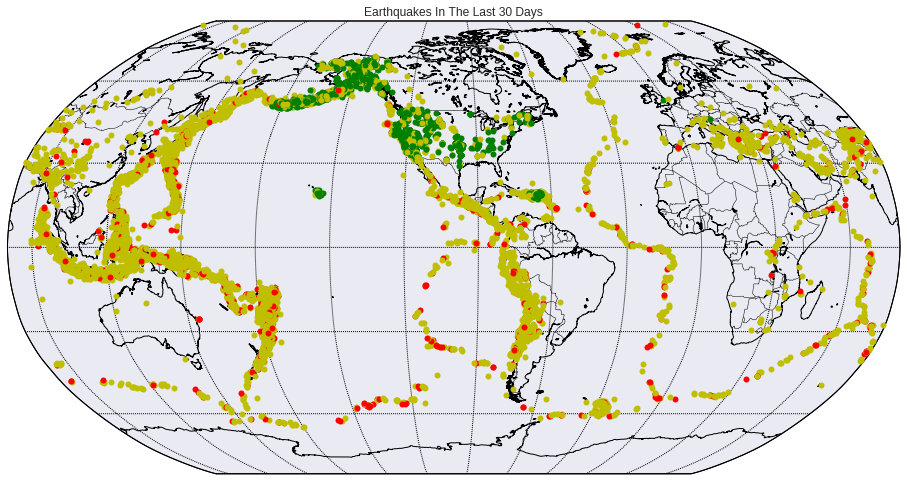

In [6]:
from mpl_toolkits.basemap import Basemap


plt.figure(figsize=(16,12))

my_map = Basemap(projection='robin', lat_0=0, lon_0=-100,
              resolution='l', area_thresh=1000.0)

lats = np.array(quakes.latitude)
longs = np.array(quakes.longitude)
mags = np.array(quakes.mag)
depths = np.array(quakes.depth)
# print lats

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))

min_marker_size = 3.0
for lon, lat, mag in zip(longs, lats, mags):
    x,y = my_map(lon, lat)
    marker_string = get_marker_color_mag(mag)
#     msize = mag * min_marker_size
    my_map.plot(x, y, marker_string, markersize=6)
    
plt.title('Earthquakes In The Last 30 Days')
plt.show()

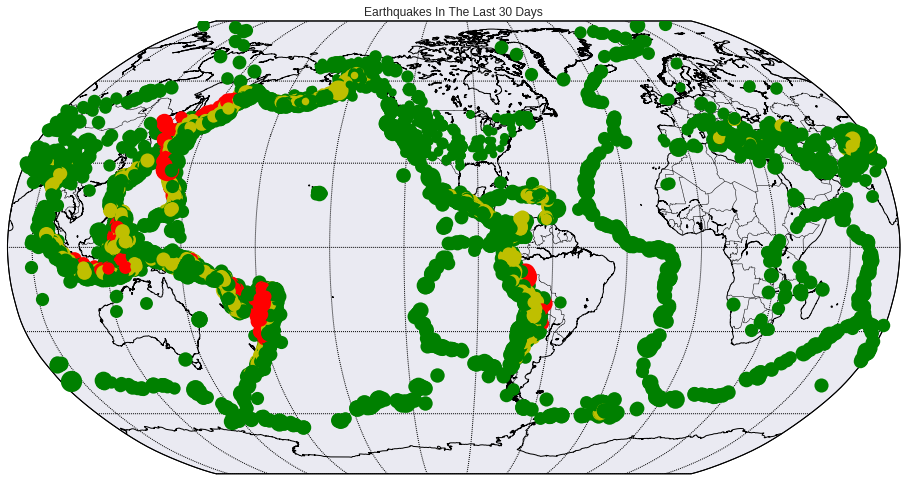

In [8]:
from mpl_toolkits.basemap import Basemap


plt.figure(figsize=(16,12))

my_map = Basemap(projection='robin', lat_0=0, lon_0=-100,
              resolution='l', area_thresh=1000.0)

lats = np.array(quakes.latitude)
longs = np.array(quakes.longitude)
mags = np.array(quakes.mag)
depths = np.array(quakes.depth)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))

min_marker_size = 3.0
for lon, lat, dep, mag in zip(longs, lats, depths, mags):
    x,y = my_map(lon, lat)
    marker_string = get_marker_color_depth(dep)
    msize = mag * min_marker_size
    my_map.plot(x, y, marker_string, markersize=msize)
    
plt.title('Earthquakes In The Last 30 Days')
plt.show()

In [ ]:
quakes.groupby('mag').mean()

In [ ]:
quakes.groupby('depth').mean()